# NLP

In this notebook, it will:

    I. present NLP in general term

    II. Environment used to run the code

    III. An example to use Tranformers: gradio
    
    IV. Transformers Pipeline 

## I. NLP & Tranformers

Natural Language Processing (NLP) uses Machine Learning (ML) techniques to process human language automatically in order to reduce human efforts.

The common NLP tasks are:

  * Sentiment-Analysis : classify text based on some categories (eg. positive/negative, sentiments...)

  * Text-Generation : generate text based on some criteria

  * Named-Entity-Recognition : mark some entities in text (eg. names, brands...)

  * Question-Answering : based on questions, give answers (eg. malti-choises, texts)

  * Fill-Mask : fill the blanks in text

  * Summarization : give a summary based on a text

  * Translation : to another language

  * Feature-Extraction : generate embeddings based on texts

  * Conversational : based on prompt, generate a conversation with a human

Some historical developement about language processing:

  * early stage: based on statistical analyses, model fittings, feature extractions
    
    -> decision tree, SVM, HMM, mpl ...

  * mostly recurrent NN

    -> CNN, RNN, GRU, LSTM, tranformers, Word2vec, Glove

  * NN -> pretrained general model -> finetuning

    -> GPT, BERT, BART, T5

  * NN -> large model -> prompt
  
    -> ChatGPT, Bloom, LLaMA, Alpaca, Vicuna, MOSS

Transformers

  * A package of APIs and tools for nlp (also other applications) https://huggingface.co/docs/transformers/en/index

  * It provides training data, models, training facilities tools, and other tools

  * There are some common modules:

    - Transformers: core module for model manipulations

    - Tokenizer: manipulate tokens and tokenize texts

    - Datasets: load, process, save dataset

    - Evaluate: help to define metrics

    - PEFT: for finetuning pretrained models

    - Accelerate:  for distributed training
    
    - ...



## II. Environment

### GPU

* I have 2 GPUs : NVIDIA GeForce RTX 3090 

* They are not connected directly (NCCL not working)

* CUDA Version: 12.3 

### Modules

* set a virtual environment

* pytorch: Version: 2.3.1

* Transformers: Version: 4.41.2

* VS code on remote connection

## III. gradio

Create web based model inference. The doc is : https://www.gradio.app/

In [7]:
import gradio as gr
from transformers import pipeline

# text classification*

gr.Interface.from_pipeline(pipeline("text-classification")).launch()

2024-06-18 15:16:37.464776: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-18 15:16:37.464838: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-18 15:16:37.467083: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-18 15:16:37.479438: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-18 15:16:39.639761: W tensorflow/compiler/tf2

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


To open the interface: 

* If the above cell was run locally, just open the provided link.

* If it was run on a ssh server, one should forward the port of the ssh connection first and then open the link.

The page looks like:

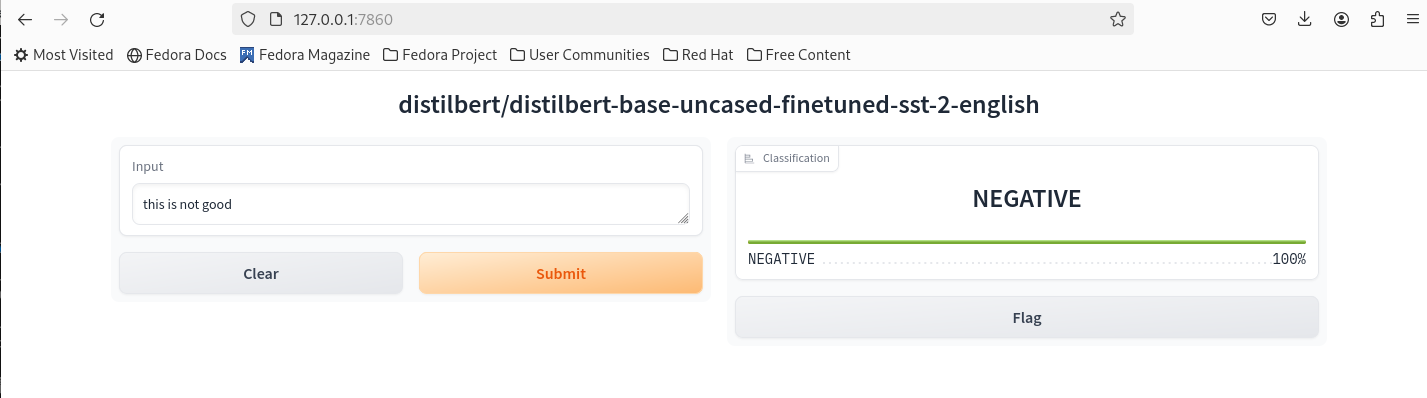

### * Transformers Tasks

In [4]:
from transformers.pipelines import SUPPORTED_TASKS
for k, v in SUPPORTED_TASKS.items():
    print(k, v)

audio-classification {'impl': <class 'transformers.pipelines.audio_classification.AudioClassificationPipeline'>, 'tf': (), 'pt': (<class 'transformers.models.auto.modeling_auto.AutoModelForAudioClassification'>,), 'default': {'model': {'pt': ('superb/wav2vec2-base-superb-ks', '372e048')}}, 'type': 'audio'}
automatic-speech-recognition {'impl': <class 'transformers.pipelines.automatic_speech_recognition.AutomaticSpeechRecognitionPipeline'>, 'tf': (), 'pt': (<class 'transformers.models.auto.modeling_auto.AutoModelForCTC'>, <class 'transformers.models.auto.modeling_auto.AutoModelForSpeechSeq2Seq'>), 'default': {'model': {'pt': ('facebook/wav2vec2-base-960h', '55bb623')}}, 'type': 'multimodal'}
text-to-audio {'impl': <class 'transformers.pipelines.text_to_audio.TextToAudioPipeline'>, 'tf': (), 'pt': (<class 'transformers.models.auto.modeling_auto.AutoModelForTextToWaveform'>, <class 'transformers.models.auto.modeling_auto.AutoModelForTextToSpectrogram'>), 'default': {'model': {'pt': ('suno

## IV. Transformers Process

Behind the scene of pipeline, there are several steps to output the results:

1) define tokenizer

2) define model

3) data processing

4) inference

5) post-processing

In [7]:
# 1) define tokenizer

from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("distilbert/distilbert-base-uncased-finetuned-sst-2-english")
tokenizer

DistilBertTokenizerFast(name_or_path='distilbert/distilbert-base-uncased-finetuned-sst-2-english', vocab_size=30522, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}

In [6]:
# 2) defien model

from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained("distilbert/distilbert-base-uncased-finetuned-sst-2-english")
model

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
 

In [4]:
# 3) data processing

# The tokenizer retures a dict of 2 elements: "input_ids" and "attention_mask".
# The "input_ids" contains the numberical tokens, which are the number of the vocabulary

input_text = "I am not sure I will buy it again."

toks = tokenizer(input_text, return_tensors="pt")

toks

{'input_ids': tensor([[ 101, 1045, 2572, 2025, 2469, 1045, 2097, 4965, 2009, 2153, 1012,  102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [5]:
# 4) inference

# the model outputs logits
# we have 2 classes, so we have 2 logits

output = model(**toks)
output

SequenceClassifierOutput(loss=None, logits=tensor([[ 4.3065, -3.4585]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [8]:
# 5) post-processing

# without other requirements, we can do softmax of the logits and the numerical label

import torch

logits = torch.softmax(output.logits, dim=-1)

print("logits: ", logits)

pred = torch.argmax(logits).item()

print("prediction: ", pred)


logits:  tensor([[9.9958e-01, 4.2415e-04]], grad_fn=<SoftmaxBackward0>)
prediction:  0


In [11]:
# to ouput the text label, we can do as following
# the label information is defined in the model config
# if not defined, we can define this

res = model.config.id2label.get(pred)
res

'NEGATIVE'